<a href="https://colab.research.google.com/github/dostonshernazarov/MachineLearning_models/blob/main/IsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from fastai.vision.all import *
from ipywidgets import widgets

In [4]:
# dataset path
path = untar_data(URLs.PETS)/'images'

In [6]:
def is_cat(x): return x[0].isupper()

In [9]:
# Train
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224)
    )

model = cnn_learner(dls, resnet34, metrics=accuracy)
model.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.169541,0.023670,0.989175,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.057062,0.042978,0.991881,00:54
1,0.031909,0.016762,0.995264,00:49


In [16]:
# Upload photo

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is Cat ?: True
Probability: 1.000


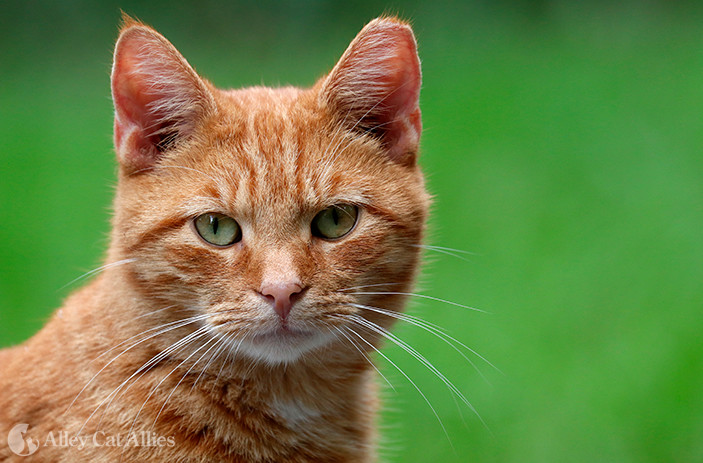

In [18]:
# Predict
img = PILImage.create(upload.data[-1])
pred, _, prob = model.predict(img)

print(f"Is Cat ?: {pred}")
print(f"Probability: {prob[1].item():.3f}")
img
